In [1]:
from transformers import (GPT2LMHeadModel, GPT2TokenizerFast,
                          BertForMaskedLM, BertTokenizerFast,
                          DistilBertForMaskedLM, DistilBertTokenizerFast,
                          RobertaForMaskedLM, RobertaTokenizerFast,
                          BlenderbotForCausalLM, BlenderbotTokenizer,
                          BigBirdForMaskedLM, BigBirdTokenizer,
                          ElectraForMaskedLM, ElectraTokenizerFast,
                          CTRLLMHeadModel, CTRLTokenizer)
import pandas as pd
from tqdm import tqdm
import torch
import pysrt

In [2]:
from lmeval.datasets import Dataset
from lmeval.engine import StridingLM

In [ ]:
# To do:
# Find pretrained for all models
# Try script with all models (maybe try on beast? - if so deactivate GPU)
# Transfer data
# Make datasets

In [3]:
models = [GPT2LMHeadModel,
          BertForMaskedLM,
          DistilBertForMaskedLM, 
          RobertaForMaskedLM, 
          BlenderbotForCausalLM, 
          BigBirdForMaskedLM,
          ElectraForMaskedLM]
model_ids = ['gpt2', 'bert-base-uncased', 'distilbert-base-uncased',
             'roberta-base', 'facebook/blenderbot-400M-distill', 
             'bigbird-roberta-base', 'electra-base']
tokenizers = [GPT2TokenizerFast,
              BertTokenizerFast,
              DistilBertTokenizerFast,
              RobertaTokenizerFast,
              BlenderbotTokenizer,
              BigBirdTokenizer,
              ElectraTokenizerFast,
              CTRLTokenizer]
ctx_lengths = [5, 10, 15, 20]


# NOTE:


# TO DOS
# Transfer data
# Get dataset
# Make function
# Test that models work
# Run in loops
# Also run w/ both token and word-level segmentation

In [4]:
model_id = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_id)
tokenizer = GPT2TokenizerFast.from_pretrained(model_id)

In [5]:
dataset = Dataset('lmeval/data/Sherlock_1.txt')
dataset.text = dataset.text[:200]
engine = StridingLM()
res = engine.run(dataset, tokenizer, model, model_id)

Running gpt2,lmeval/data/Sherlock_1.txt, 20


100%|██████████| 20/20 [00:06<00:00,  3.28it/s]


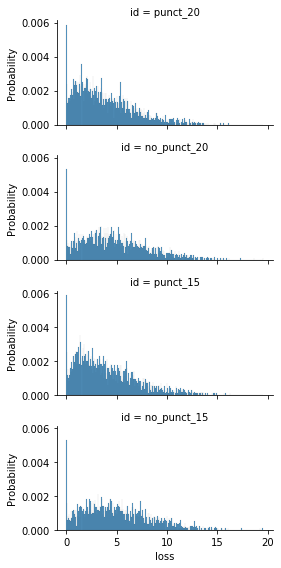

In [123]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.displot(data=df, x='loss', height=2, aspect=2, row='id', stat='probability', binwidth=.05)
plt.show()

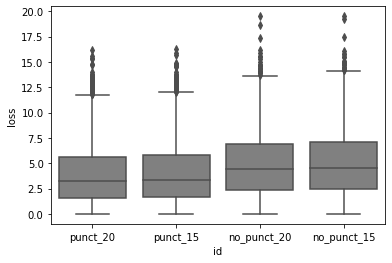

In [129]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.boxplot(data=df, x='id', y='loss', 
            order=['punct_20', 'punct_15', 'no_punct_20', 'no_punct_15'],
            color='grey')
plt.show()

In [118]:
df.sort_values(by='loss').tail(n=5)[['context', 'best', 'target']].to_records()

rec.array([(11519, "'s given it away if she'd left him he would have kept it", 'ally', 'sentiment'),
           ( 5360, " expensive email enabled player and you're looking for a you wouldn't buy this it's a gift", 'off', 'scratches'),
           ( 9428, ' in this way is a mystery and a shock to all who knew him', 'ing', 'taxi'),
           (11358, " you're looking for a you wouldn't buy this it's a gift", 'off', 'scratches'),
           ( 3430, ' have taken his own life in this way is a mystery and a shock to all who knew him', 'drivers', 'taxi')],
          dtype=[('index', '<i8'), ('context', 'O'), ('best', 'O'), ('target', 'O')])

In [119]:
df.sort_values(by='loss').head(n=10)[['context', 'best', 'target']].to_records()

rec.array([(  228, ' her? Got them out of her bag. Where is she? The body of Beth Daven', '.', 'port'),
           ( 6221, ' of her bag. Where is she? The body of Beth Daven', ',', 'port'),
           ( 1303, "'t know a thing about each other. I don't know where we're meeting, I don", 'know', "'t"),
           ( 7296, " each other. I don't know where we're meeting, I don", 'know', "'t"),
           ( 5912, "'t pretend you worked that out somebody told you that your deodorant told me that my de", 'ant', 'odor'),
           ( 1649, " if you'll be needing two bedrooms. Of course we'll be needing two. Oh, don", 'worry', "'t"),
           ( 4357, " we've only just met and we're going to go and look at a flat problem we don", 'know', "'t"),
           ( 7642, " two bedrooms. Of course we'll be needing two. Oh, don", 'worry', "'t"),
           (10040, " was wondering maybe later when you're finished you're wearing lipstick you weren", 'wearing', "'t"),
           ( 8879, ' were right. I was r